In [34]:
dataset_name = "Cora"

## 2 layer GAT

In [65]:
# Import the utility functions
import torch
from src.experiment_utils import FaithfulnessExperimentBatch
import networkx as nx
from torch_geometric.utils import get_num_hops

device = torch.device("cpu")
dataset_folder = "/workspace/Datasets"
model_folder = "/workspace/Models"
config = "2L1H"

# Load the network data locally (for reproduction)
data = torch.load(f"{dataset_folder}/{dataset_name}.pt").to(device)
# Load model as a whole
model = torch.load(f"{model_folder}/GAT_{dataset_name}_{config}.pt").to(device)
model.eval()
k = get_num_hops(model)

with torch.no_grad():
    _  = model(data.x, data.edge_index, return_att = True)
    att = list(model.att)

target_node = 100 
experiment = FaithfulnessExperimentBatch(model = model, data = data, device = "cpu")
experiment.set_target_nodes([target_node])
_ = experiment.get_attributions()
att_matrix_dict, _ = experiment._prep_to_get_attattribute()
attattribute = experiment.attattribute_matrix
attattribute_sim = experiment.attattribute_sim_matrix
avg_att = torch.stack([att_matrix_dict[key] for key in att_matrix_dict.keys()]).mean(dim = 0).squeeze()

Target nodes set...
Generating edge lists within 2 hops of target nodes...
...Done
Getting attributions for 1 nodes...
...Done


In [47]:
raw_att0 = torch.zeros((data.num_nodes, data.num_nodes))
raw_att1 = torch.zeros((data.num_nodes, data.num_nodes))

raw_att0[att[0][0][1], att[0][0][0]] = att[0][1].squeeze()
raw_att1[att[1][0][1], att[1][0][0]] = att[1][1].squeeze()

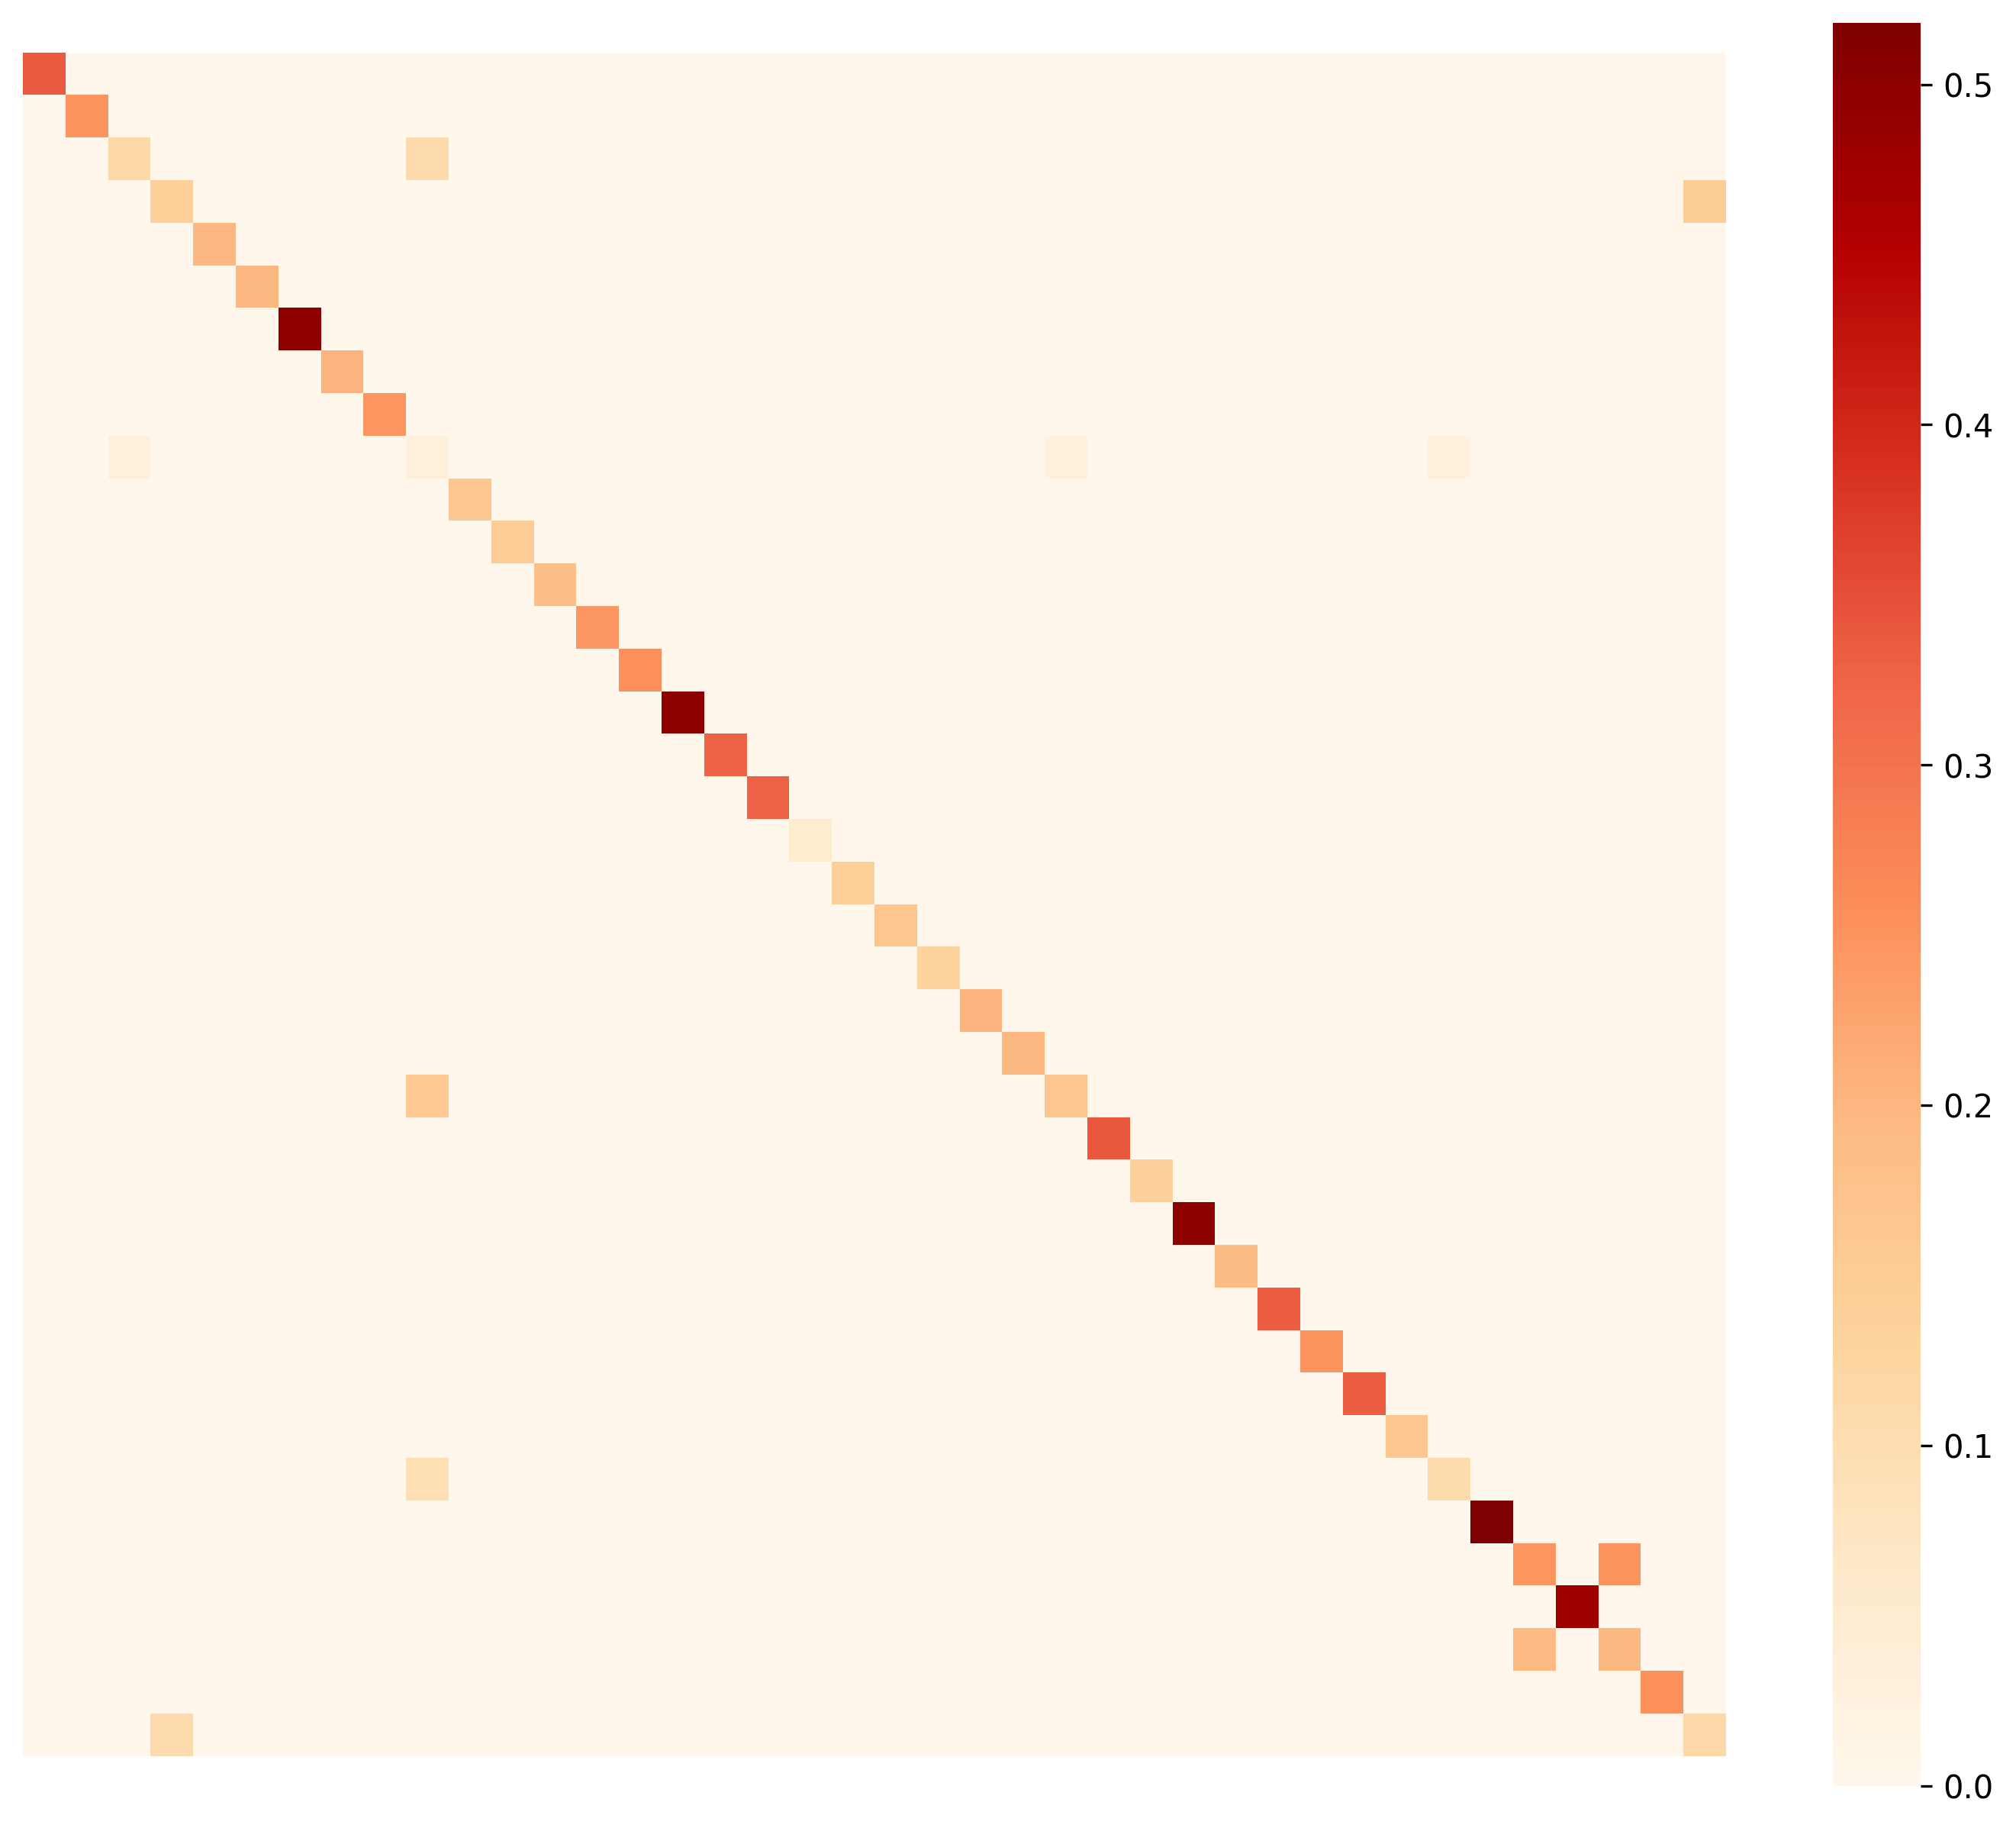

In [48]:
# Draw raw attention weights
import matplotlib.pyplot as plt
import seaborn as sns

# Plot raw_att0 only
plt.figure(figsize = (12, 10), dpi = 300)
sns.heatmap(raw_att0[100:140, 100:140], 
            cmap = "OrRd", 
            square = True, 
            cbar = True,
            xticklabels=False,
            yticklabels=False)
plt.show()

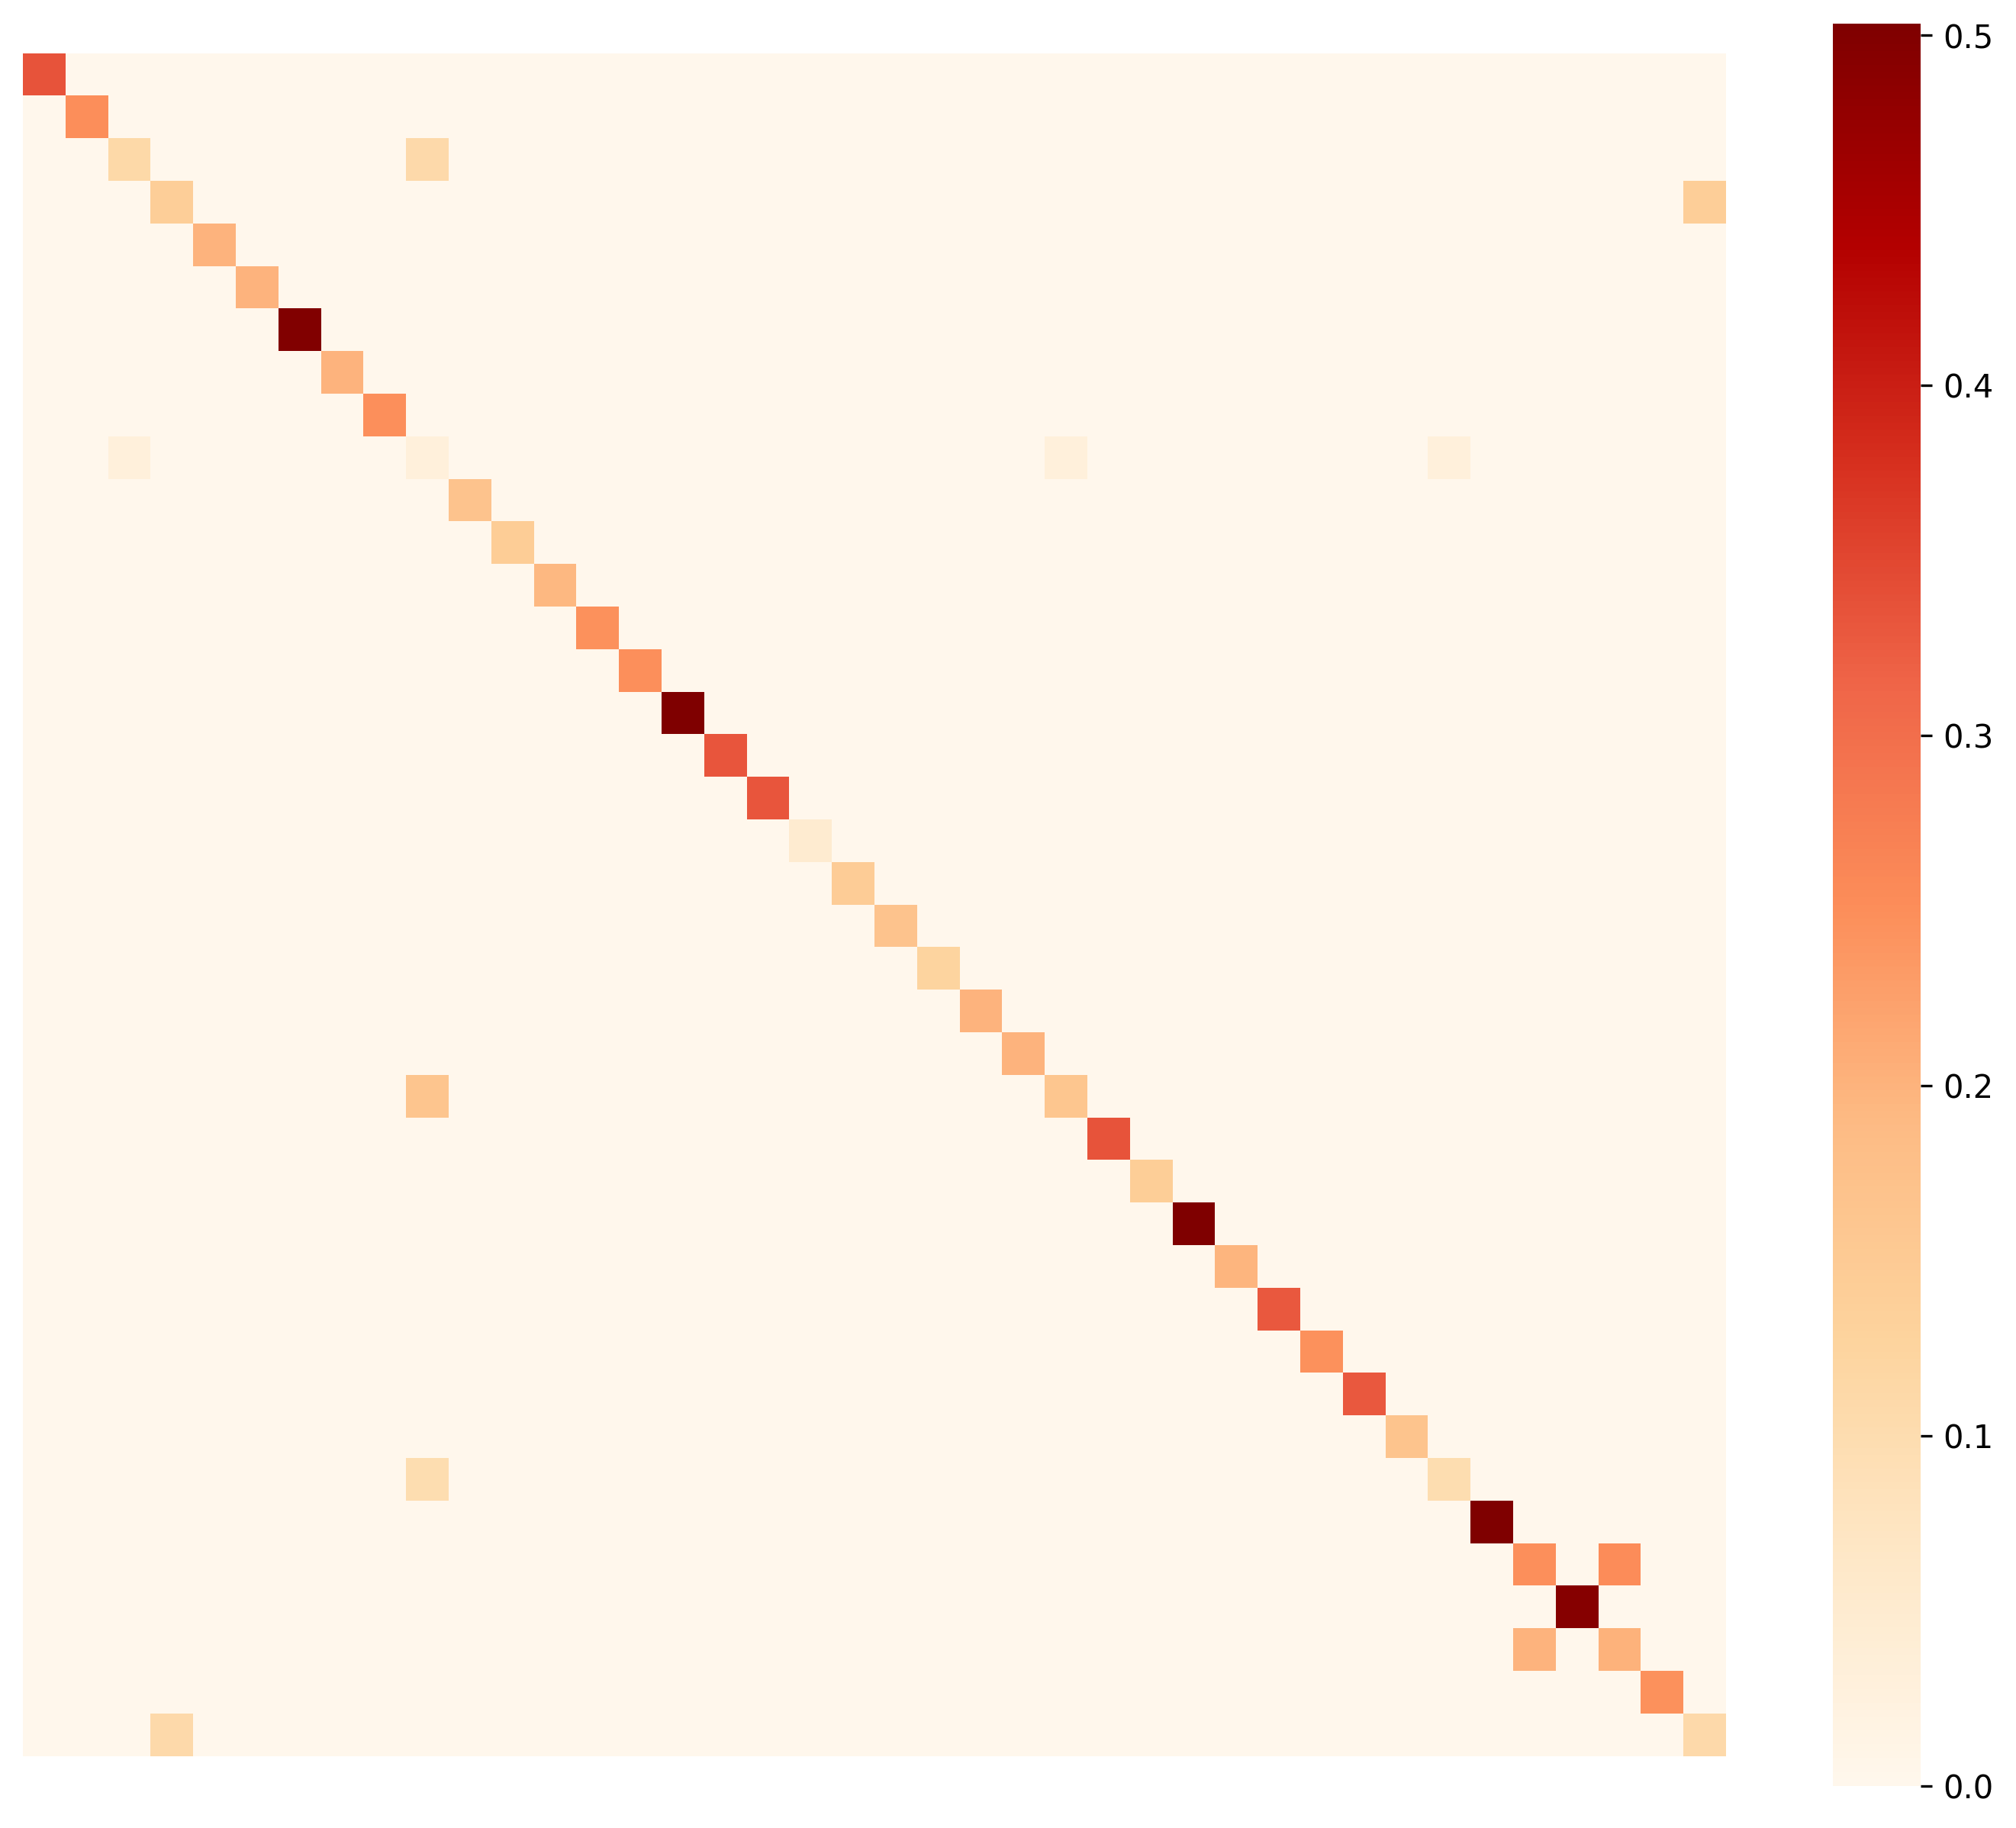

In [49]:
# Draw raw attention weights
import matplotlib.pyplot as plt
import seaborn as sns

# Plot raw_att0 only
plt.figure(figsize = (12, 10), dpi = 300)
sns.heatmap(raw_att1[100:140, 100:140], 
            cmap = "OrRd", 
            square = True, 
            cbar = True,
            xticklabels=False,
            yticklabels=False)
plt.show()

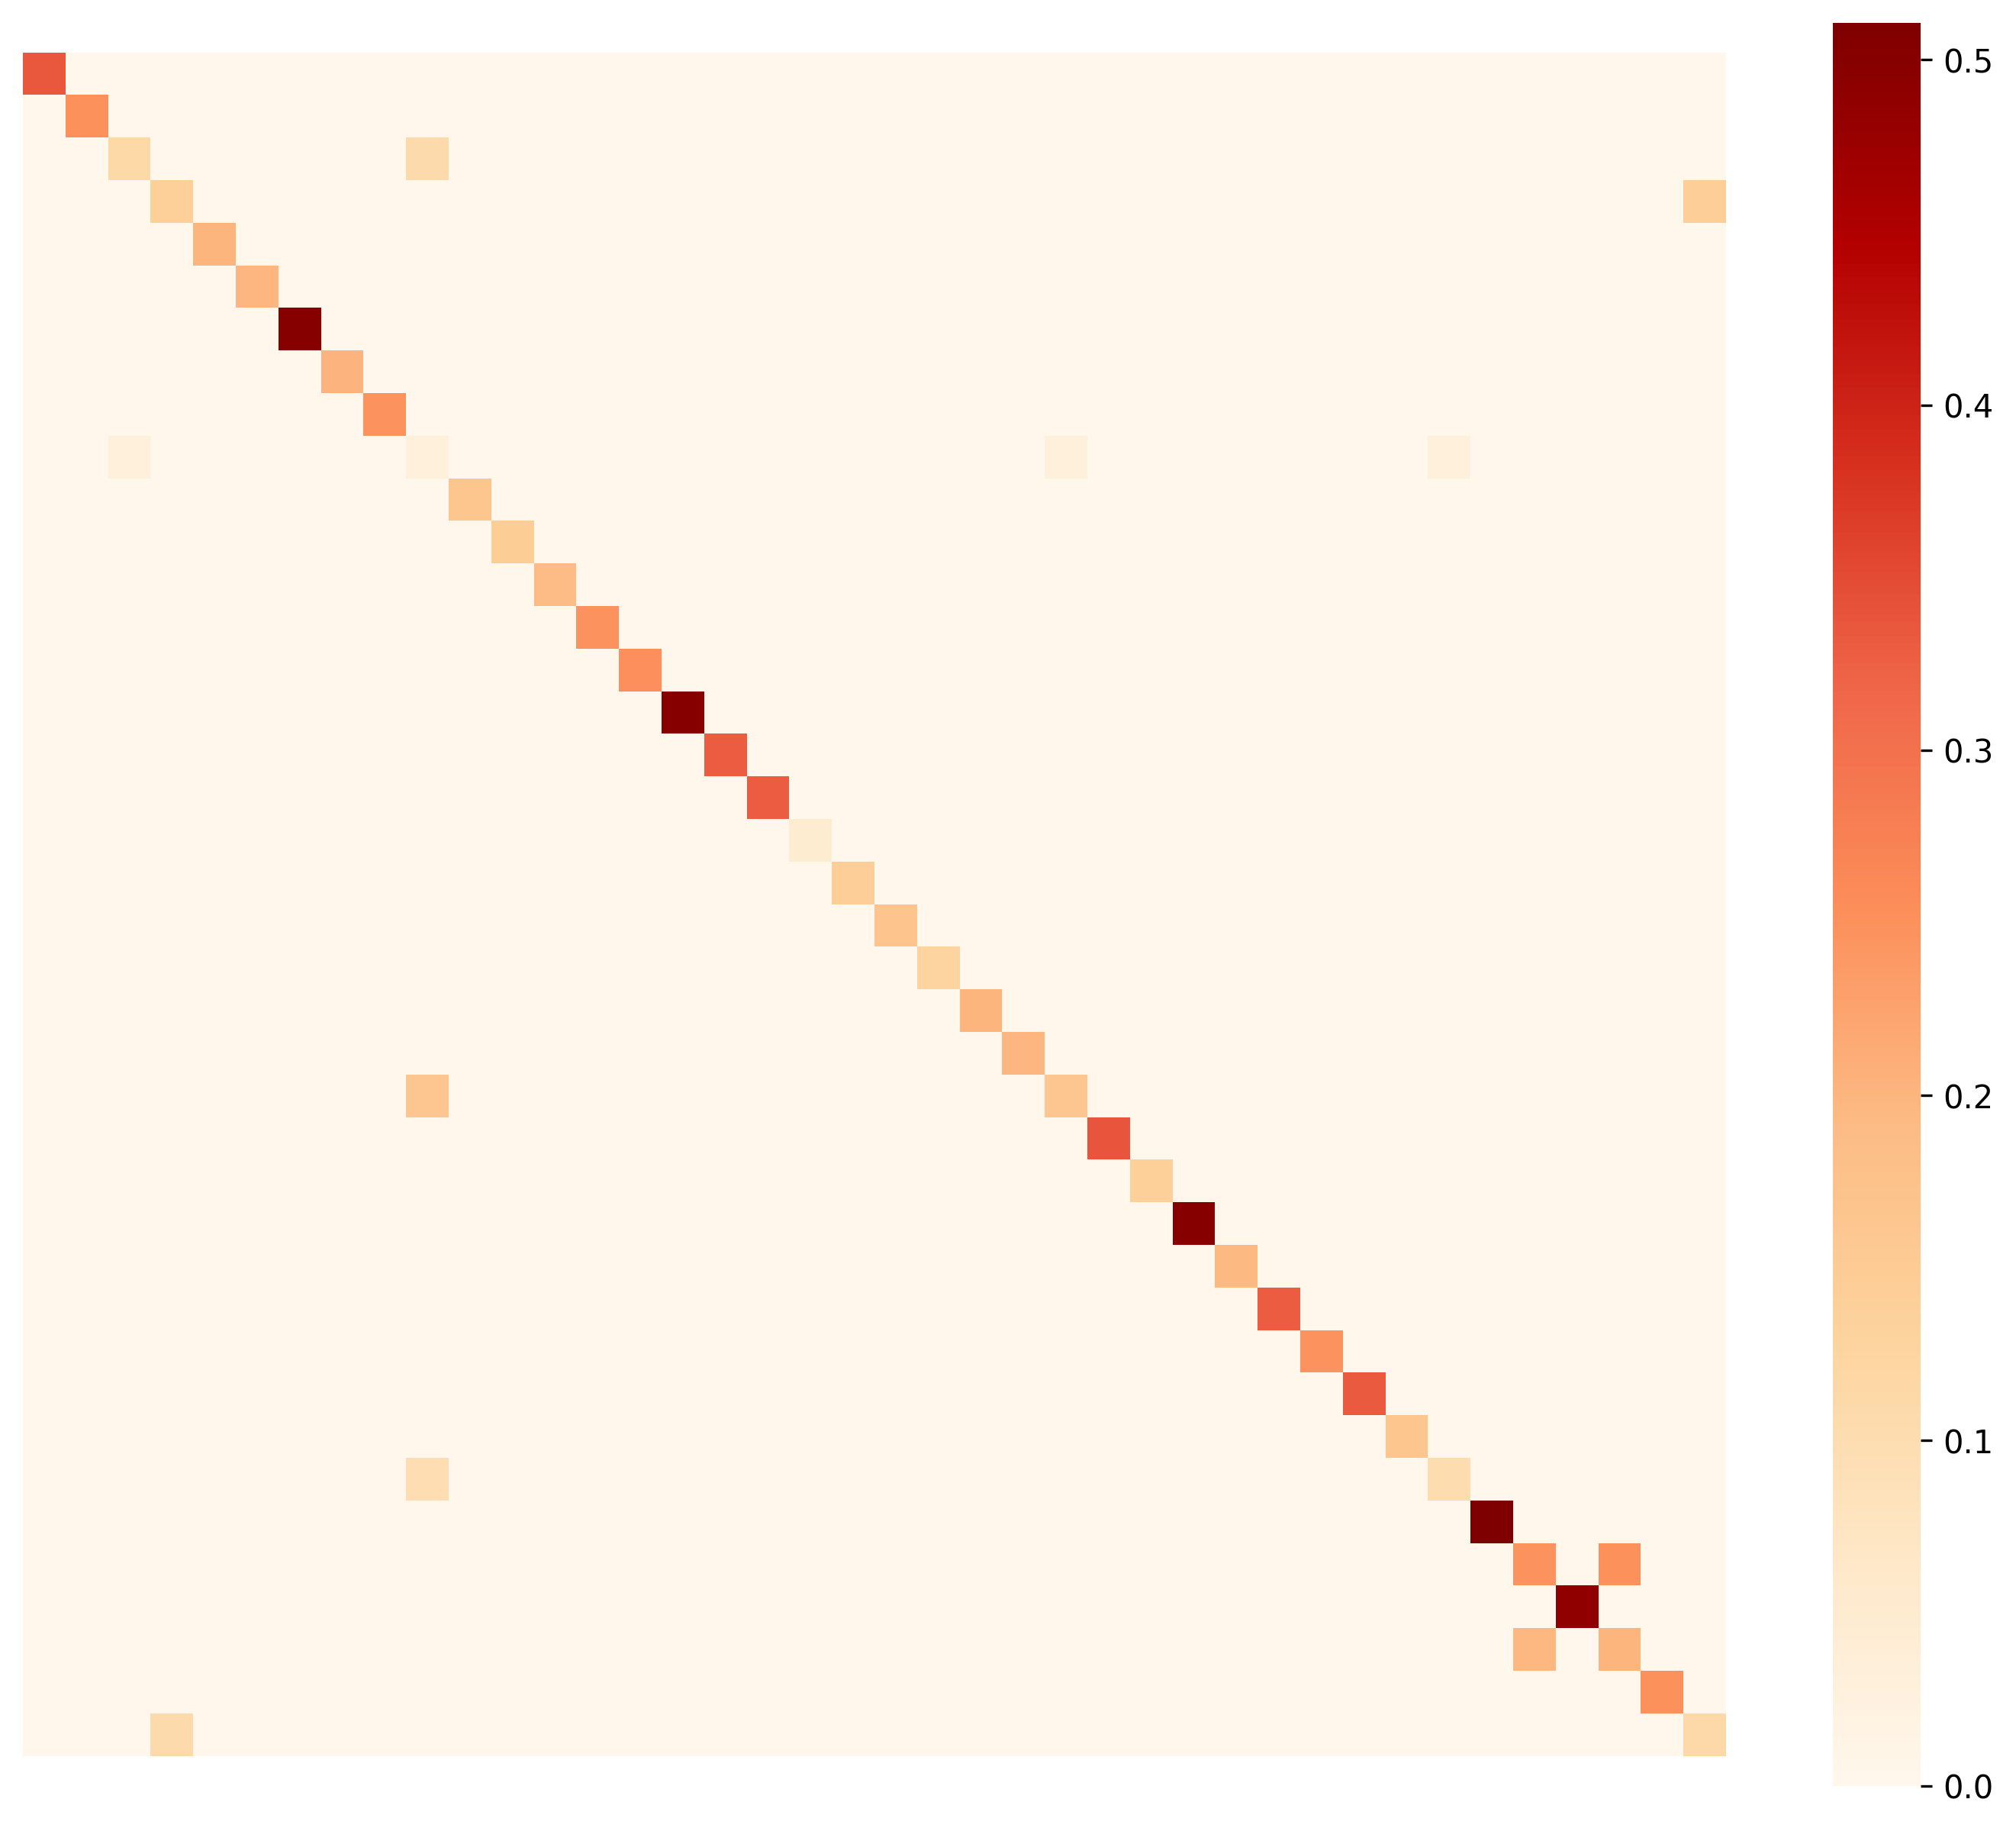

In [56]:
# Draw raw attention weights
import matplotlib.pyplot as plt
import seaborn as sns

# Plot raw_att0 only
plt.figure(figsize = (12, 10), dpi = 300)
sns.heatmap(avg_att[100:140, 100:140],
            cmap = "OrRd", 
            square = True, 
            cbar = True,
            xticklabels=False,
            yticklabels=False)
plt.show()

In [67]:
# Import the utility functions
import torch
from src.experiment_utils import FaithfulnessExperimentBatch
import networkx as nx
from torch_geometric.utils import get_num_hops

device = torch.device("cpu")
dataset_folder = "/workspace/Datasets"
model_folder = "/workspace/Models"
config = "3L1H"

# Load the network data locally (for reproduction)
data = torch.load(f"{dataset_folder}/{dataset_name}.pt").to(device)
# Load model as a whole
model = torch.load(f"{model_folder}/GAT_{dataset_name}_{config}.pt").to(device)
model.eval()
k = get_num_hops(model)

with torch.no_grad():
    _  = model(data.x, data.edge_index, return_att = True)
    att = list(model.att)

target_node = 100 
experiment = FaithfulnessExperimentBatch(model = model, data = data, device = "cpu")
experiment.set_target_nodes([target_node])
_ = experiment.get_attributions()
att_matrix_dict, _ = experiment._prep_to_get_attattribute()
attattribute = experiment.attattribute_matrix
attattribute_sim = experiment.attattribute_sim_matrix
avg_att = torch.stack([att_matrix_dict[key] for key in att_matrix_dict.keys()]).mean(dim = 0).squeeze()

Target nodes set...
Generating edge lists within 3 hops of target nodes...
...Done
Getting attributions for 1 nodes...
...Done


In [70]:
raw_att0 = torch.zeros((data.num_nodes, data.num_nodes))
raw_att1 = torch.zeros((data.num_nodes, data.num_nodes))
raw_att2 = torch.zeros((data.num_nodes, data.num_nodes))

raw_att0[att[0][0][1], att[0][0][0]] = att[0][1].squeeze()
raw_att1[att[1][0][1], att[1][0][0]] = att[1][1].squeeze()
raw_att2[att[2][0][1], att[2][0][0]] = att[2][1].squeeze()

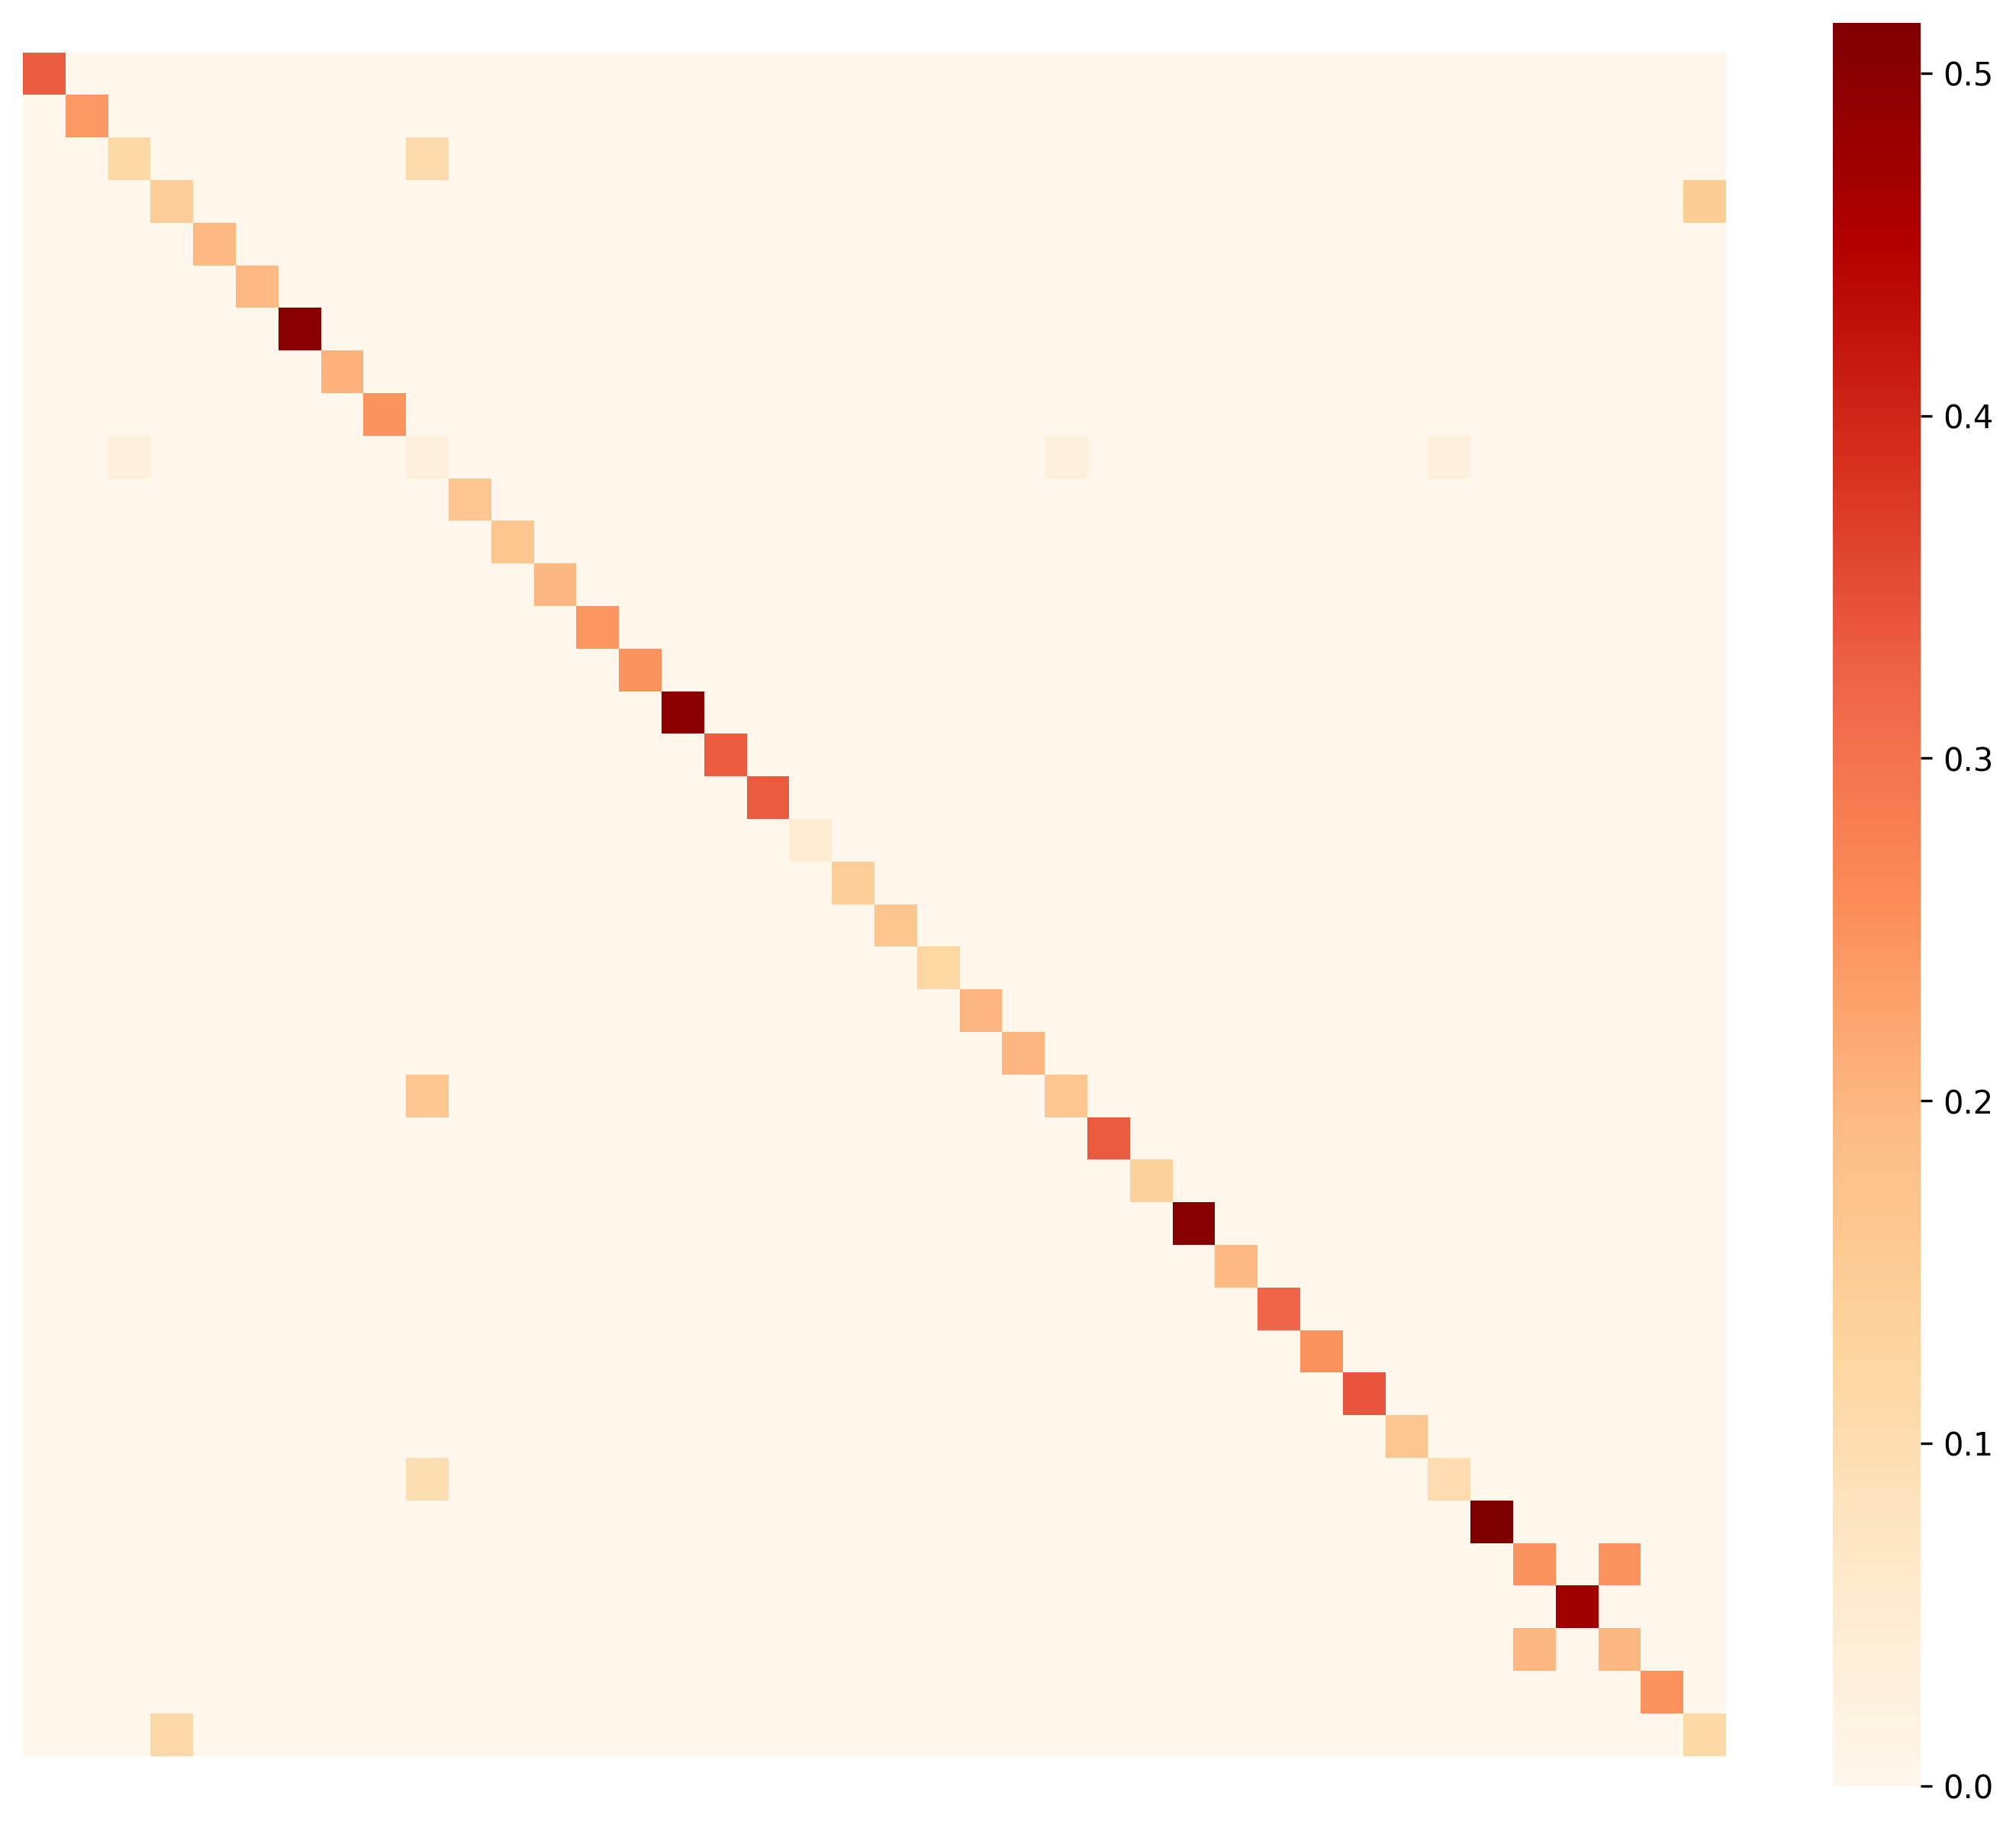

In [71]:
# Draw raw attention weights
import matplotlib.pyplot as plt
import seaborn as sns

# Plot raw_att0 only
plt.figure(figsize = (12, 10), dpi = 300)
sns.heatmap(raw_att0[100:140, 100:140], 
            cmap = "OrRd", 
            square = True, 
            cbar = True,
            xticklabels=False,
            yticklabels=False)
plt.show()

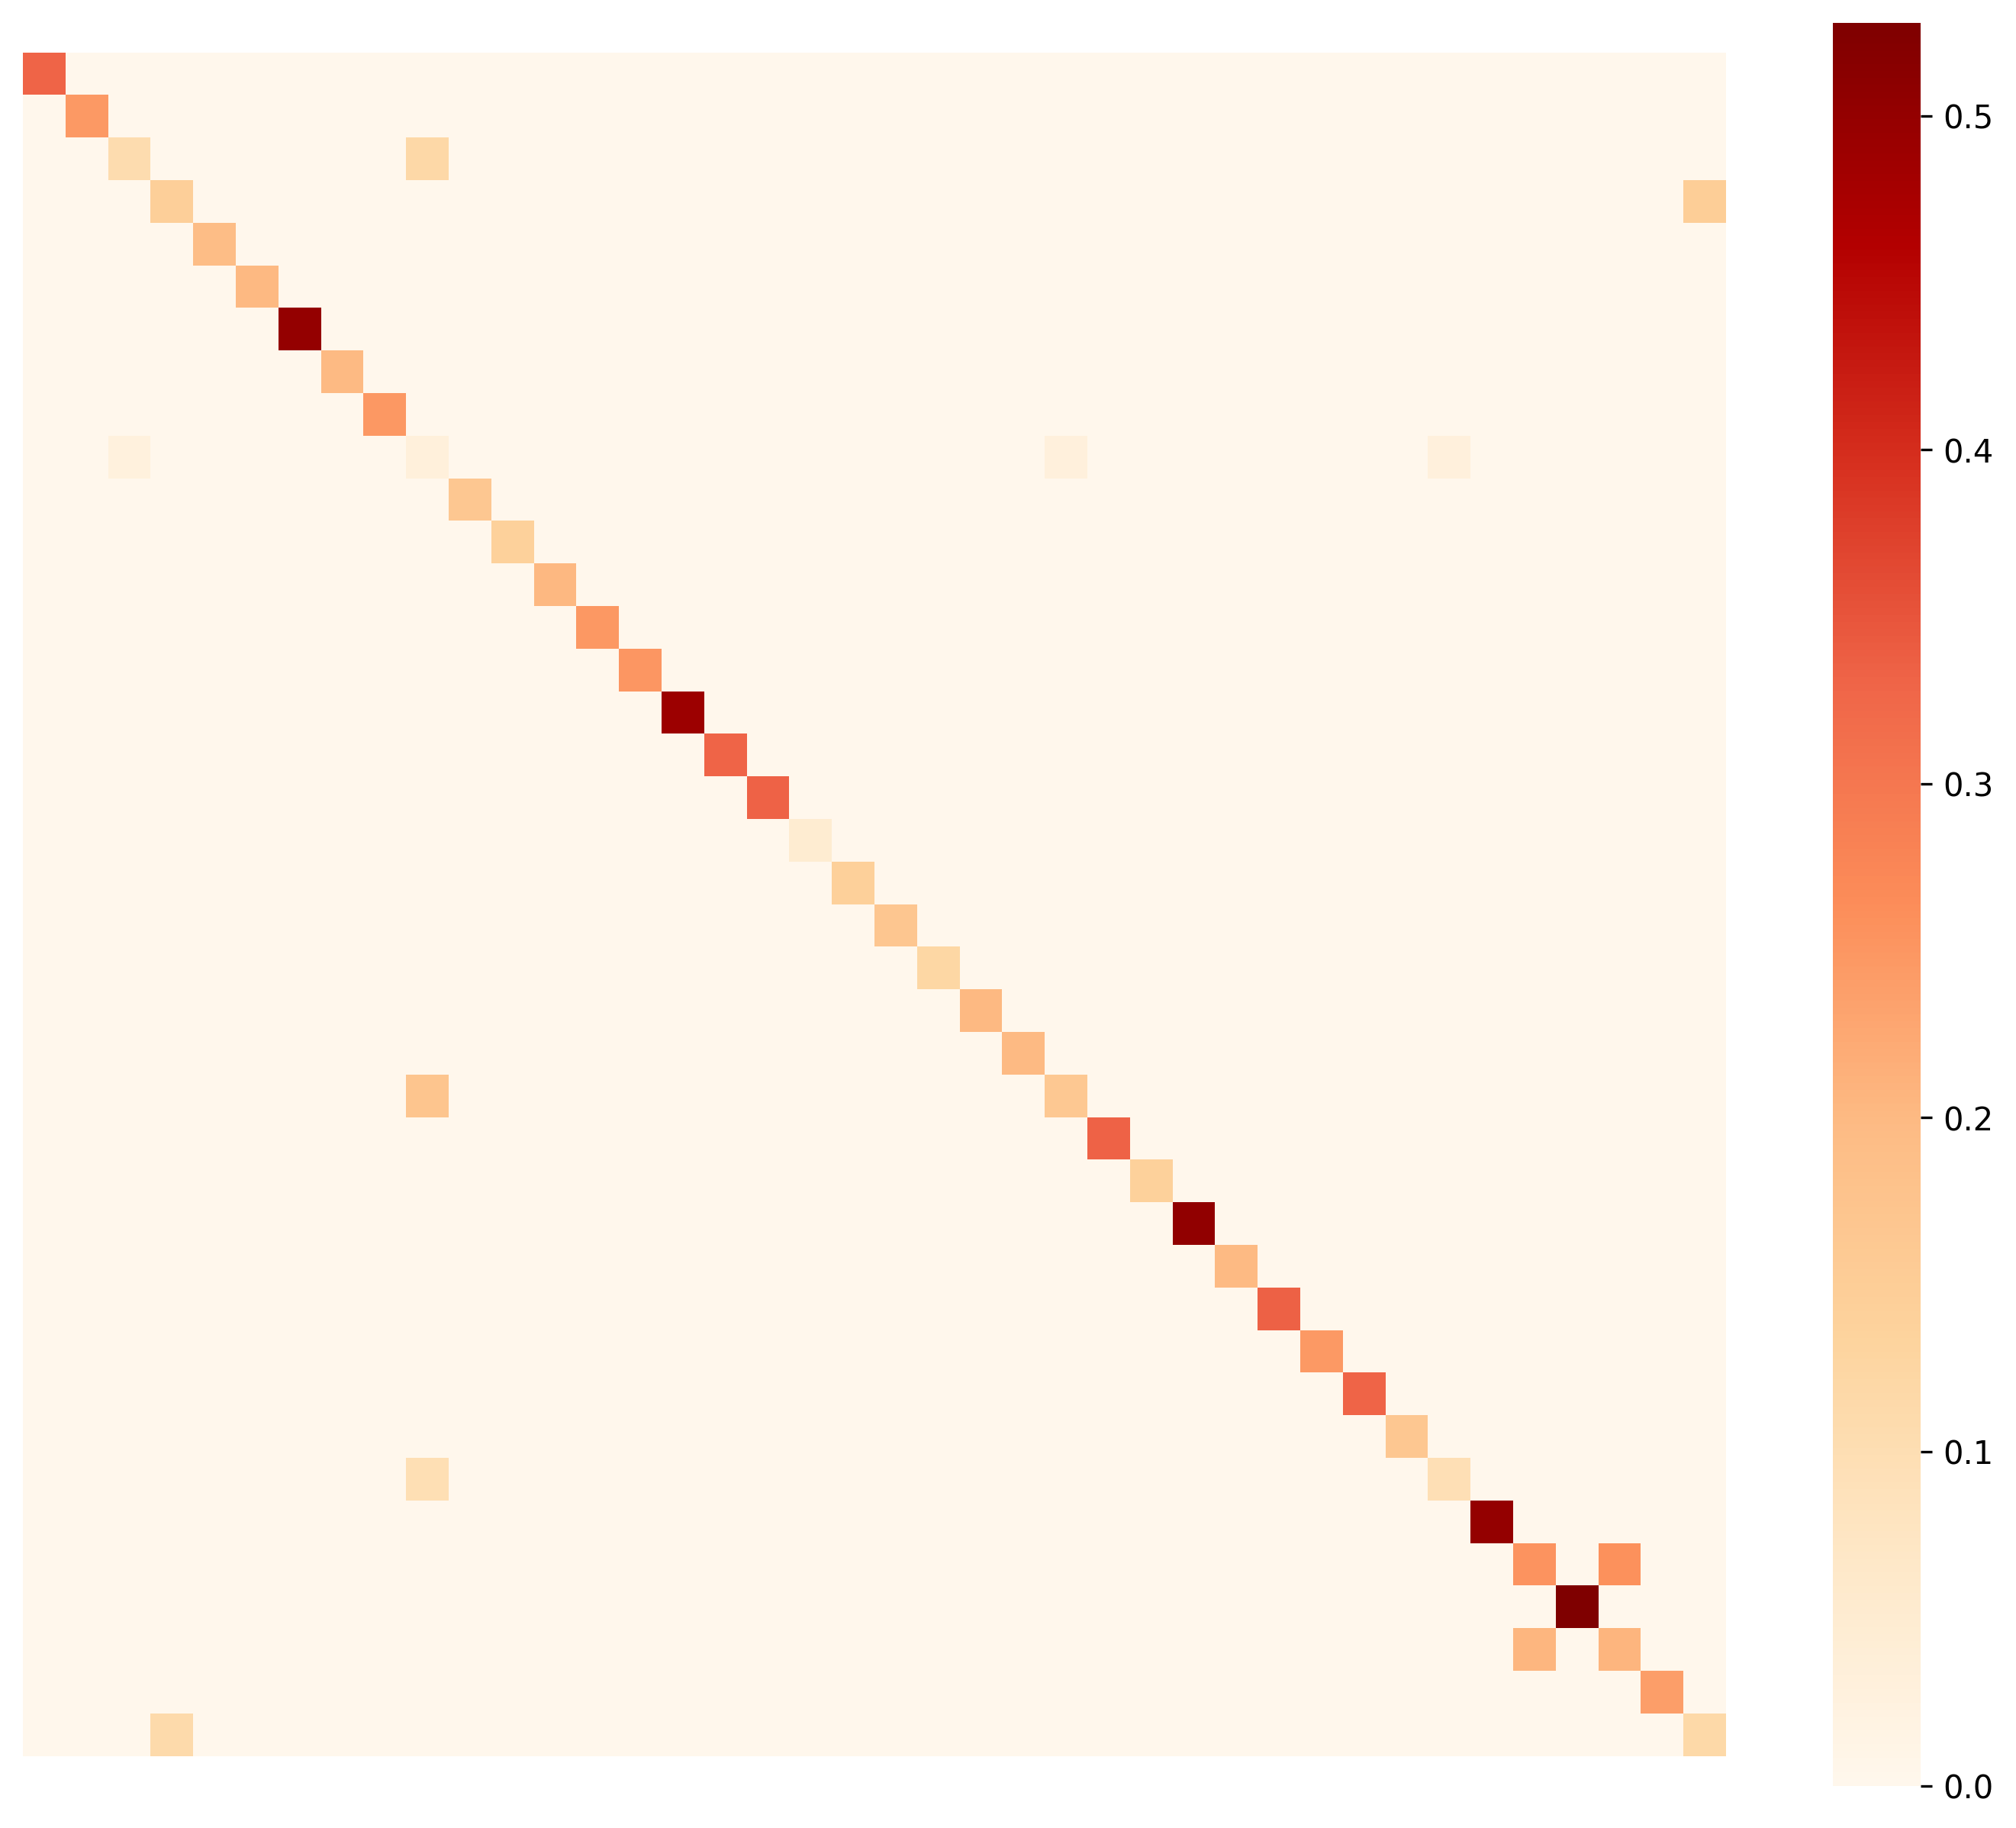

In [72]:
# Draw raw attention weights
import matplotlib.pyplot as plt
import seaborn as sns

# Plot raw_att0 only
plt.figure(figsize = (12, 10), dpi = 300)
sns.heatmap(raw_att1[100:140, 100:140], 
            cmap = "OrRd", 
            square = True, 
            cbar = True,
            xticklabels=False,
            yticklabels=False)
plt.show()

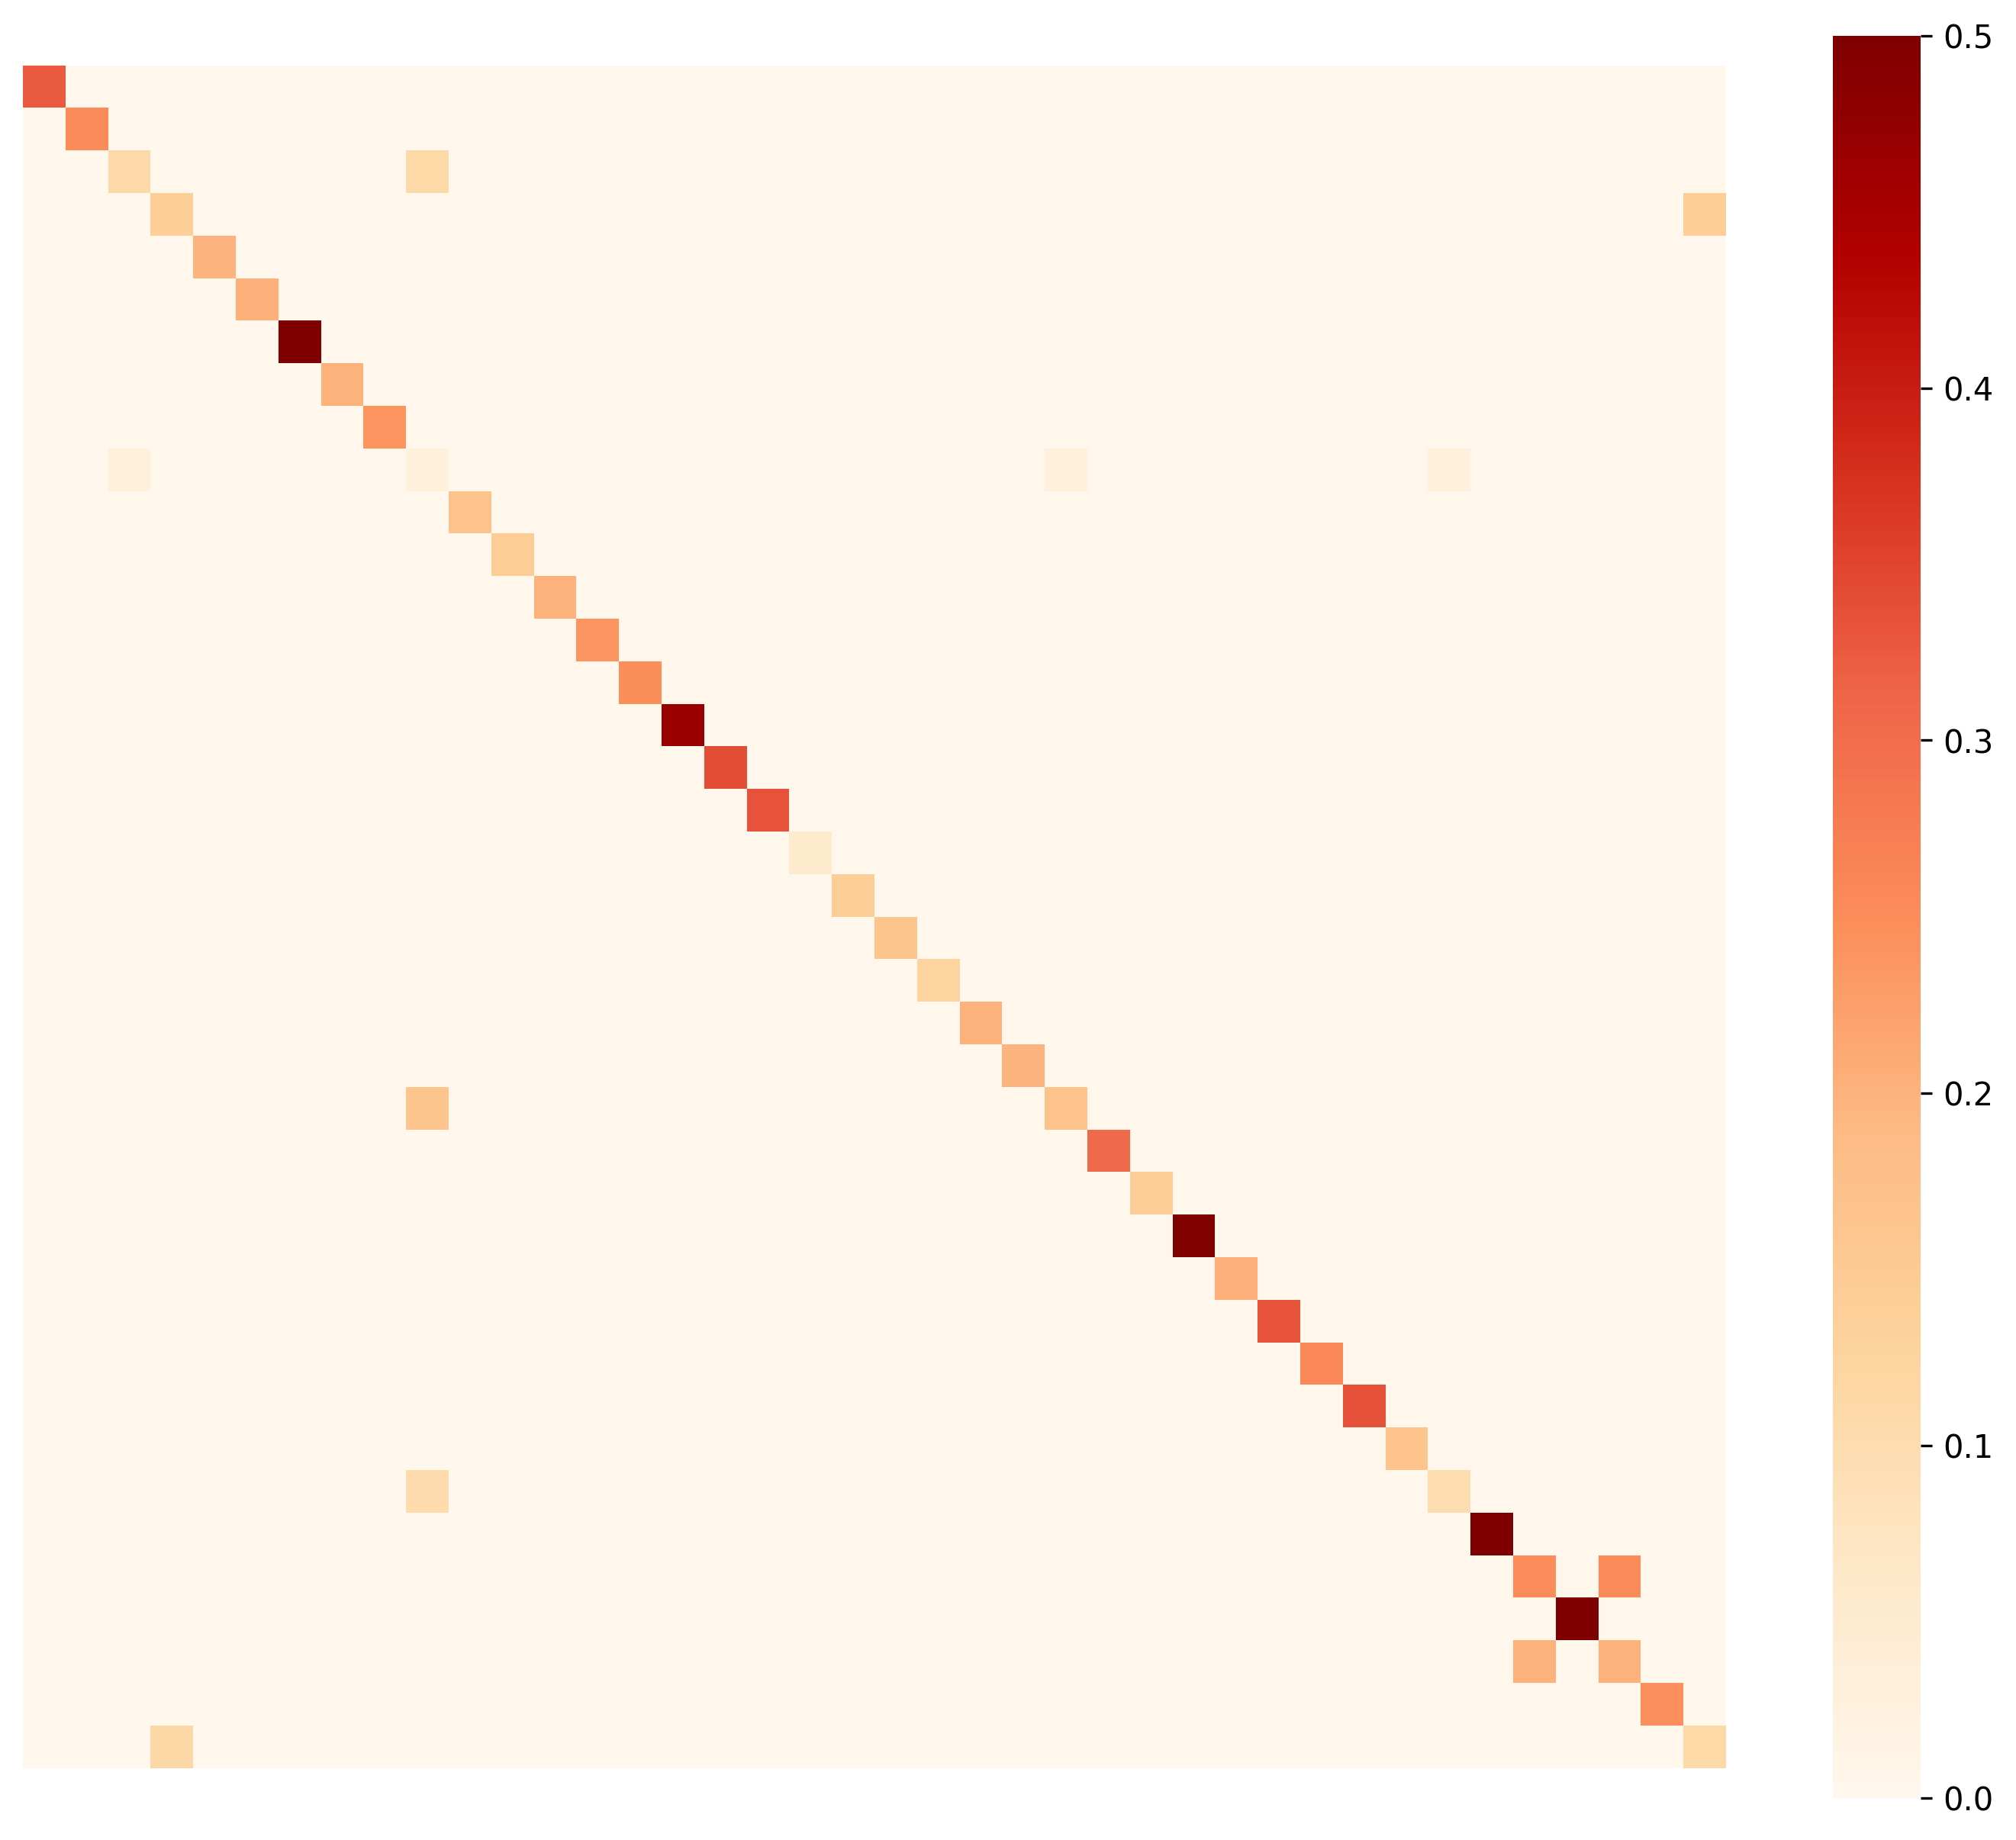

In [73]:
# Draw raw attention weights
import matplotlib.pyplot as plt
import seaborn as sns

# Plot raw_att0 only
plt.figure(figsize = (12, 10), dpi = 300)
sns.heatmap(raw_att2[100:140, 100:140], 
            cmap = "OrRd", 
            square = True, 
            cbar = True,
            xticklabels=False,
            yticklabels=False)
plt.show()